# Classical ML approach

## Feature Engineering

**Intuition**:
 We can find the simple statistical feature for good prediction:
  - mean, std;
  - min, max;
  - 25%, 50%, 75%.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from IPython.display import display

import sys
sys.path.append('../src')
from utils import *
sys.path.remove('../src')

In [2]:
# load data
df_samples = pd.read_csv('../data/data.csv', index_col='Unnamed: 0')
df_targets = pd.read_csv('../data/target_train.csv')
display(df_samples.head(4))

print('Taking features by feature engineering')
df_props = feature_engineering(df_samples)
display(df_props.head(4))

print('Make labels a binary')
df_targets['labels'] = df_targets['target'].apply(lambda x: 0 if x == 'OD' else 1)
print('Add labels')
df_props = pd.merge(df_targets[['id', 'labels']], df_props, on='id')

display(df_props.head(4))

,id,time,ch0,ch1,ch2
0,1_1,0,372.271894,350.219643,408.527289
1,1_1,1,373.393195,349.845876,411.143658
2,1_1,2,371.898127,350.219643,412.638726
3,1_1,3,371.898127,350.967177,413.386260


Taking features by feature engineering


,id,ch0_mean,ch0_std,ch0_min,ch0_25%,ch0_50%,ch0_75%,ch0_max,ch1_mean,ch1_std,...,ch1_50%,ch1_75%,ch1_max,ch2_mean,ch2_std,ch2_min,ch2_25%,ch2_50%,ch2_75%,ch2_max
0,1_1,372.823823,59.454892,-27.284988,367.412923,370.776826,374.140729,866.018051,344.986750,39.969085,...,356.573682,364.049021,383.858670,399.059928,49.083127,370.403059,378.252165,383.111136,406.658454,866.018051
1,2_1,373.564972,98.170505,-262.758174,368.160457,371.898127,375.262030,1166.152921,343.370364,60.537962,...,356.573682,365.170322,387.970106,403.912357,77.323821,365.917856,380.121000,386.101272,405.910921,1166.152921
2,4_1,375.149900,77.360223,295.275900,351.340944,368.534224,381.242301,1069.721045,345.019610,20.214943,...,346.108207,358.816283,407.032221,410.768178,74.900695,342.370537,384.606204,395.445446,418.618997,1069.721045
3,5_1,373.982345,84.538827,182.772044,349.472109,364.983438,378.625932,1124.291021,346.074879,27.205842,...,349.472109,361.432652,398.809348,408.648764,84.655027,349.098342,377.504631,391.707776,409.648590,1124.291021


Make labels a binary
Add labels


,id,labels,ch0_mean,ch0_std,ch0_min,ch0_25%,ch0_50%,ch0_75%,ch0_max,ch1_mean,...,ch1_50%,ch1_75%,ch1_max,ch2_mean,ch2_std,ch2_min,ch2_25%,ch2_50%,ch2_75%,ch2_max
0,111_1,0,374.272326,96.948042,-281.446522,364.703113,373.019428,380.494767,938.902608,344.578877,...,353.957313,361.058885,386.475039,403.589205,67.071240,365.917856,384.979971,391.334009,399.930649,938.902608
1,103_1,0,373.551423,58.255132,146.516649,356.199915,371.150593,386.101272,930.305968,343.321151,...,346.668857,360.311351,396.566746,407.391505,50.337330,349.472109,385.353738,402.173251,418.245230,930.305968
2,34_2,1,373.081099,62.895965,172.306569,338.165659,377.878398,419.740298,536.729357,322.321833,...,333.400130,357.694982,410.396124,425.890011,48.516724,310.600345,391.988101,434.317210,454.874393,536.729357
3,78_1,0,373.764626,181.134428,-148.759251,362.927720,371.524360,375.262030,2451.537503,341.719248,...,359.937584,367.039157,389.465174,410.238830,170.477147,370.403059,378.999699,383.484903,398.435581,2451.537503


## ML models Training

In [3]:
# Разделяем данные на обучающий и тестовый наборы
y = df_props['labels']
X = df_props.drop(['id', 'labels'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print('#####\nLogistic Regression')
LR = train_pipeline(X_train, y_train, X_test, y_test, LogisticRegression())
print('#####\nKNN (3 neighbors)')
KNN = train_pipeline(X_train, y_train, X_test, y_test, KNeighborsClassifier(n_neighbors=2))
print('#####\nRandom Forest')
RF = train_pipeline(X_train, y_train, X_test, y_test, RandomForestClassifier())
print('#####\nXGBoost')
XGB = train_pipeline(X_train, y_train, X_test, y_test, XGBClassifier())


#####
Logistic Regression
For train_set:
Accuracy: 0.925, F1 score: 0.9237637362637363
For test set:
Accuracy: 1.0, F1 score: 1.0
#####
KNN (3 neighbors)
For train_set:
Accuracy: 0.9, F1 score: 0.896011396011396
For test set:
Accuracy: 0.95, F1 score: 0.9509971509971511
#####
Random Forest
For train_set:
Accuracy: 1.0, F1 score: 1.0
For test set:
Accuracy: 1.0, F1 score: 1.0
#####
XGBoost
For train_set:
Accuracy: 1.0, F1 score: 1.0
For test set:
Accuracy: 1.0, F1 score: 1.0


In [4]:
from joblib import dump, load

dump(RF, '../models/pipeline_RF.pkl')
dump(XGB, '../models/pipeline_XGB.pkl')

['../models/pipeline_XGB.pkl']

## Feature Importance

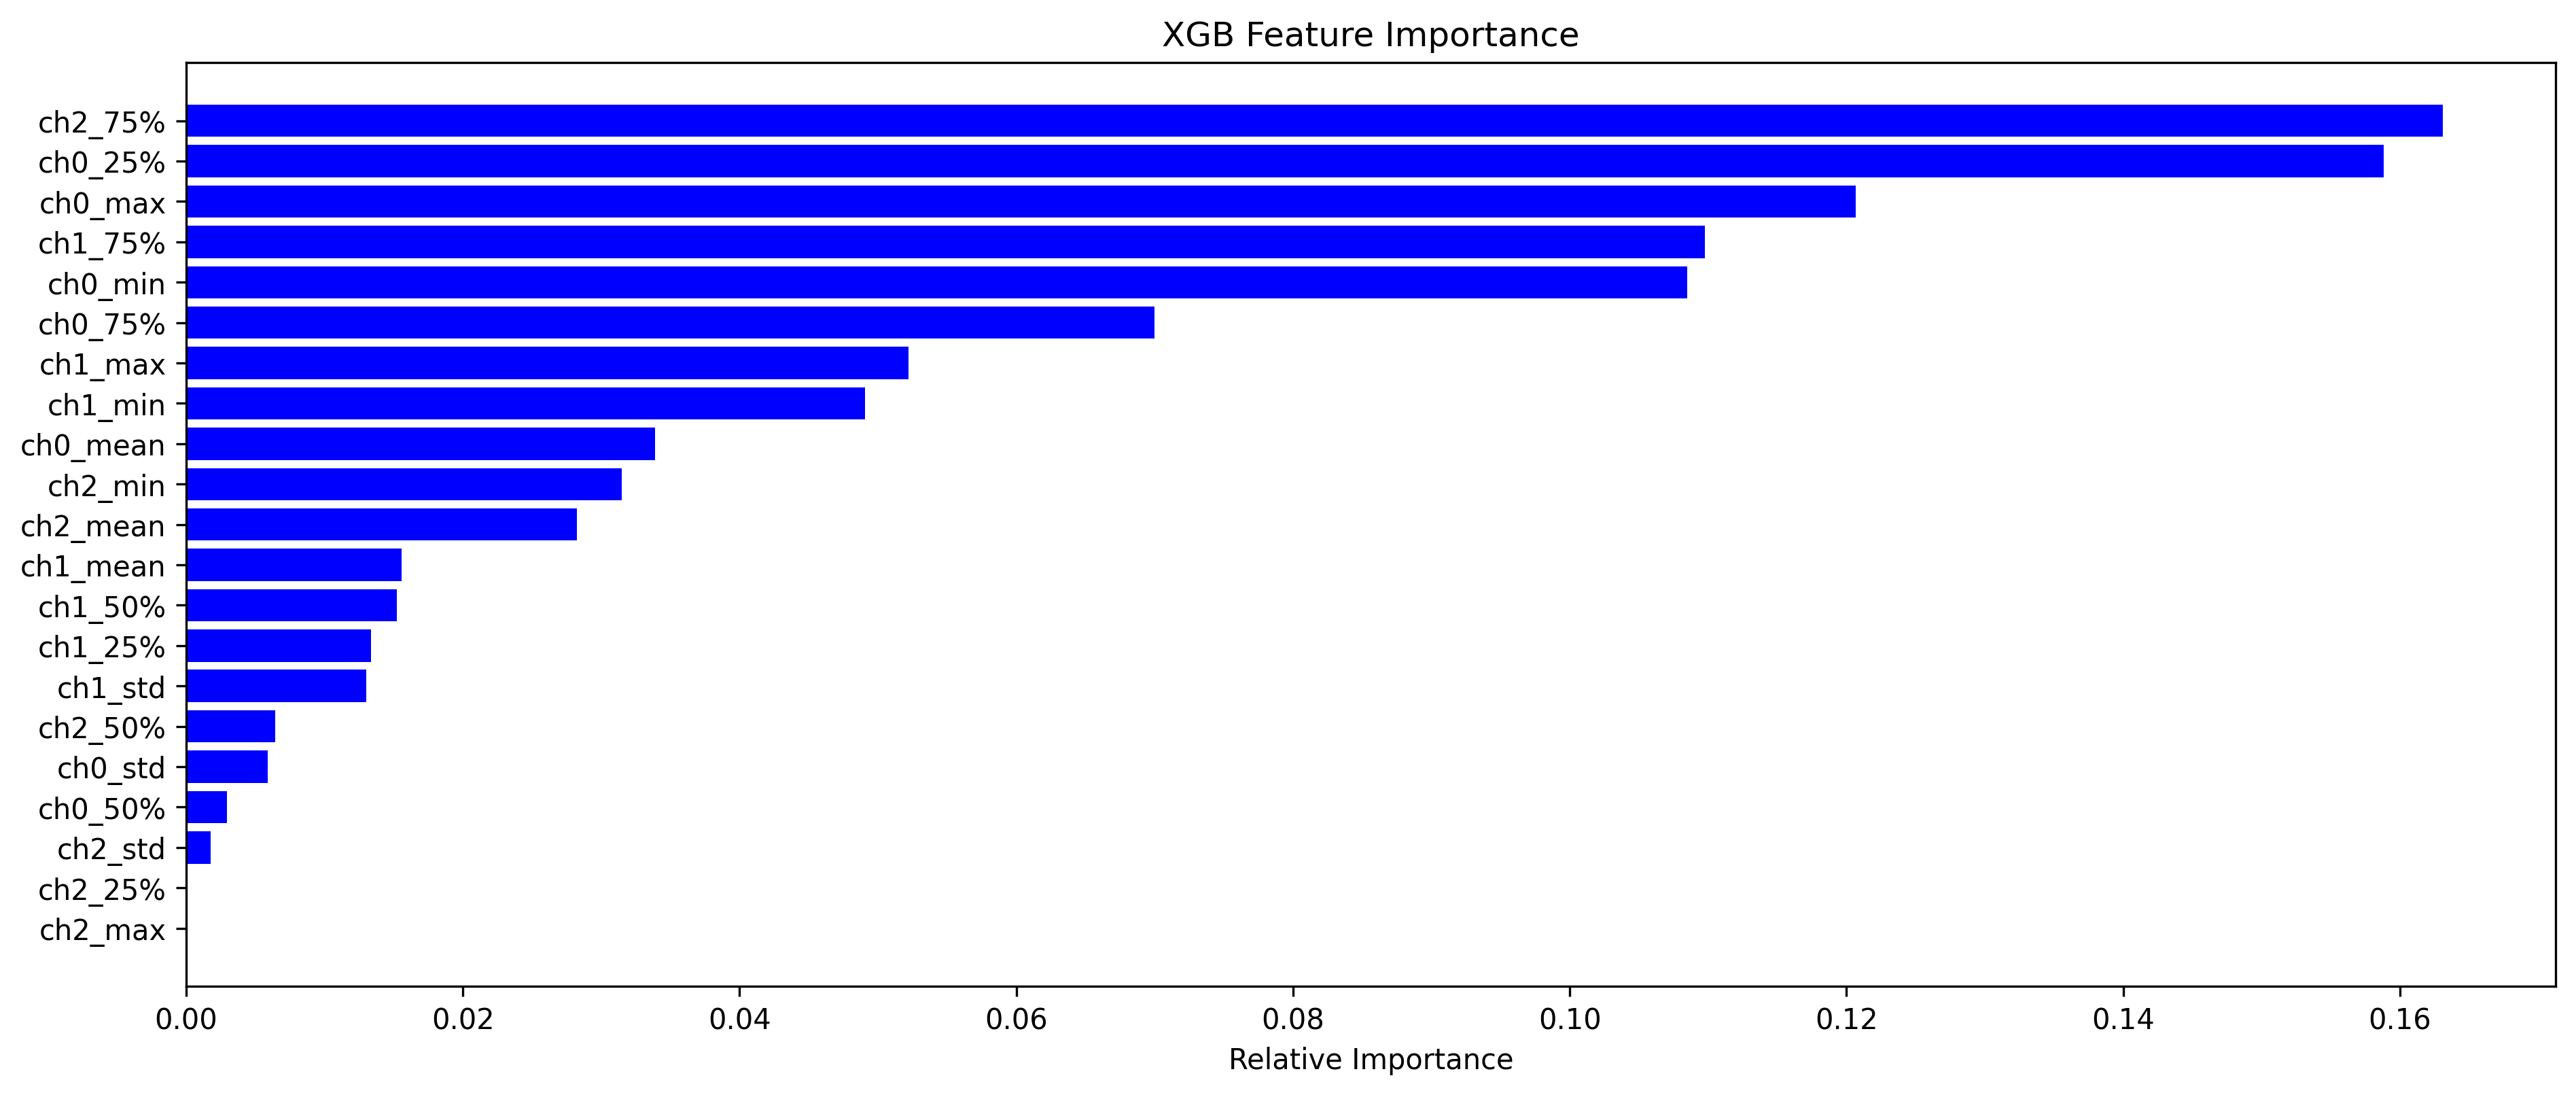

In [5]:
import numpy as np

cols = X.columns.to_list()
plt.figure(figsize=(15,6), dpi=300)
sort = XGB.named_steps['classifier'].feature_importances_.argsort()
plt.barh(np.array(cols)[sort], XGB.named_steps['classifier'].feature_importances_[sort], color = 'blue')
plt.title('XGB Feature Importance')
plt.xlabel('Relative Importance')
plt.savefig('../imgs/feat_imp.png')
plt.show()